# PART OF THE TEMPLATE

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from dpp.data import load_from_kaggle

c:\Users\Eyyub\Desktop\StackFuel\PortfolioProjekt\DPP-Stackfuel-Data-Science-Projekt\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset_link = "sulianova/cardiovascular-disease-dataset" # replace with your dataset link from Kaggle 
destination = "../data/raw"
dataset_name = dataset_link.split("/")[-1]

files = load_from_kaggle(
    dataset_link=dataset_link, 
    destination=destination,
    )

Destination directory '../data/raw\cardiovascular-disease-dataset' already exists with files. Skipping download (replace=False).


In [3]:
files

['cardio_train.csv']

In [4]:
df = pd.read_csv("/".join(["../data/raw/", dataset_name, files[0]]), delimiter=";")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
display(
    "Shape",
    df.shape,
    "Description",
    df.describe().round(2),
    "Duplicates",
    df.duplicated().sum(),
)


pd.DataFrame(
    {
        "Data Types": df.dtypes,
        "Missing Values": df.isnull().sum(),
        "Unique Values": df.nunique(),
        "Sample Values": [df[col].sample(3).tolist() for col in df.columns]
    })


'Shape'

(70000, 13)

'Description'

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.0,70000.0
mean,49972.42,19468.87,1.35,164.36,74.21,128.82,96.63,1.37,1.23,0.09,0.05,0.8,0.5
std,28851.30,2467.25,0.48,8.21,14.40,154.01,188.47,0.68,0.57,0.28,0.23,0.4,0.5
min,0.00,10798.00,1.00,55.00,10.00,-150.00,-70.00,1.00,1.00,0.00,0.00,0.0,0.0
25%,25006.75,17664.00,1.00,159.00,65.00,120.00,80.00,1.00,1.00,0.00,0.00,1.0,0.0
50%,50001.50,19703.00,1.00,165.00,72.00,120.00,80.00,1.00,1.00,0.00,0.00,1.0,0.0
75%,74889.25,21327.00,2.00,170.00,82.00,140.00,90.00,2.00,1.00,0.00,0.00,1.0,1.0
max,99999.00,23713.00,2.00,250.00,200.00,16020.00,11000.00,3.00,3.00,1.00,1.00,1.0,1.0


'Duplicates'

np.int64(0)

,Data Types,Missing Values,Unique Values,Sample Values
id,int64,0,70000,"[51894, 99137, 3747]"
age,int64,0,8076,"[18353, 14520, 21196]"
gender,int64,0,2,"[2, 2, 1]"
height,int64,0,109,"[164, 164, 172]"
weight,float64,0,287,"[58.0, 70.0, 68.0]"
ap_hi,int64,0,153,"[120, 120, 130]"
ap_lo,int64,0,157,"[80, 80, 70]"
cholesterol,int64,0,3,"[1, 1, 1]"
gluc,int64,0,3,"[1, 1, 1]"
smoke,int64,0,2,"[0, 0, 0]"


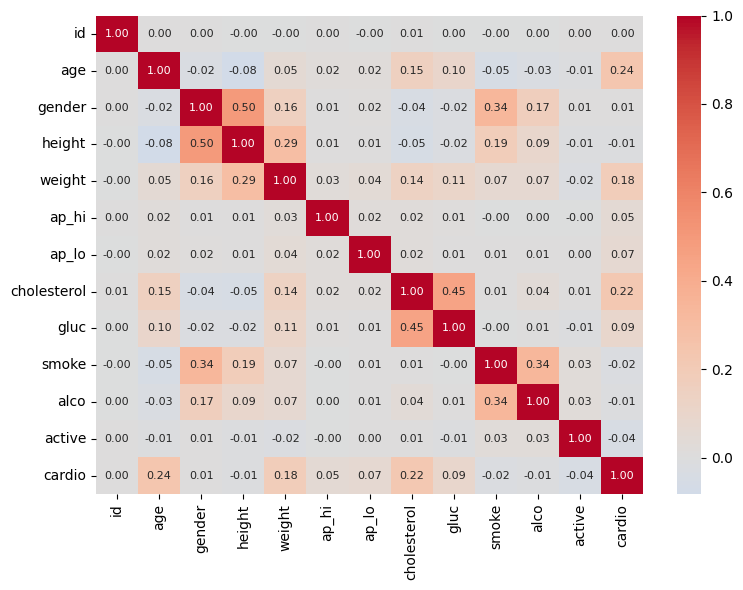

In [6]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0,
            annot_kws={"size": 8}, fmt='.2f')  # Kleinere Schrift + 2 Dezimalstellen
plt.tight_layout()
plt.show()

# ===========================================

# ===========================================

#  OWN PART BEGINS HERE

# Exploration of Data

## Imports

In [7]:
# =============================================================================
# 1. IMPORTS & SETUP
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# Configuration
warnings.filterwarnings('ignore')
#plt.style.use('seaborn-v0_8')
#sns.set_palette("husl")

# Plot settings
#plt.rcParams['figure.figsize'] = (12, 8)
#plt.rcParams['font.size'] = 11

## Load Data & Initial Inspection

In [8]:
# =============================================================================
# 2. DATA LOADING & INITIAL INSPECTION
# =============================================================================

# Load dataset (adjust path as needed)
dataset_link = "sulianova/cardiovascular-disease-dataset" # replace with your dataset link from Kaggle 
destination = "../data/raw"
dataset_name = dataset_link.split("/")[-1]

files = load_from_kaggle(
    dataset_link=dataset_link, 
    destination=destination,
    )

df = pd.read_csv("/".join(["../data/raw/", dataset_name, files[0]]), sep=";")

print(f"Dataset loaded: {df.shape[0]:,} rows, {df.shape[1]} columns")
print("\n" + "="*60)

# Display first 5 rows
print("First 5 rows:")
display(df.head())

Destination directory '../data/raw\cardiovascular-disease-dataset' already exists with files. Skipping download (replace=False).
Dataset loaded: 70,000 rows, 13 columns

First 5 rows:


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [9]:
# Basic information
print("DATASET INFO:")
print("="*40)
df.info()

print("\nSHAPE:")
print(f"Rows: {df.shape[0]:,}")
print(f"Columns: {df.shape[1]}")

DATASET INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB

SHAPE:
Rows: 70,000
Columns: 13


In [10]:
# Column names and data types
print("COLUMNS & DATA TYPES:")
print("="*40)
for col in df.columns:
    print(f"{col:15} | {str(df[col].dtype):10} | Unique: {df[col].nunique():4}")

COLUMNS & DATA TYPES:
id              | int64      | Unique: 70000
age             | int64      | Unique: 8076
gender          | int64      | Unique:    2
height          | int64      | Unique:  109
weight          | float64    | Unique:  287
ap_hi           | int64      | Unique:  153
ap_lo           | int64      | Unique:  157
cholesterol     | int64      | Unique:    3
gluc            | int64      | Unique:    3
smoke           | int64      | Unique:    2
alco            | int64      | Unique:    2
active          | int64      | Unique:    2
cardio          | int64      | Unique:    2


## Data Type Correction & Feature Categorization

In [11]:
# =============================================================================
# 3. DATA TYPE CORRECTION & FEATURE CATEGORIZATION
# =============================================================================

print("CORRECTING DATA TYPES:")
print("="*40)

# Define correct data types based on dataset documentation
dtype_mapping = {
    # Objective Features
    'id': 'int64',
    'age': 'int32',           # Age in days
    'height': 'int16',        # Height in cm
    'weight': 'float32',      # Weight in kg
    'gender': 'category',     # 1: female, 2: male
    
    # Examination Features
    'ap_hi': 'int16',         # Systolic blood pressure
    'ap_lo': 'int16',         # Diastolic blood pressure
    'cholesterol': 'category', # 1: normal, 2: above normal, 3: well above normal
    'gluc': 'category',       # 1: normal, 2: above normal, 3: well above normal
    
    # Subjective Features
    'smoke': 'category',      # Binary: 0 or 1
    'alco': 'category',       # Binary: 0 or 1
    'active': 'category',     # Binary: 0 or 1
    
    # Target Variable
    'cardio': 'category'      # Binary: 0 or 1
}

# Apply data type conversions
print("Before conversion:")
print(df.dtypes)
print("\n" + "-"*40 + "\n")

for col, dtype in dtype_mapping.items():
    if col in df.columns:
        try:
            df[col] = df[col].astype(dtype)
            print(f"{col:15} → {dtype}")
        except Exception as e:
            print(f"{col:15} → {dtype} (failed: {e})")

print("\n" + "-"*40 + "\n")
print("After conversion:")
print(df.dtypes)

CORRECTING DATA TYPES:
Before conversion:
id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

----------------------------------------

id              → int64
age             → int32
height          → int16
weight          → float32
gender          → category
ap_hi           → int16
ap_lo           → int16
cholesterol     → category
gluc            → category
smoke           → category
alco            → category
active          → category
cardio          → category

----------------------------------------

After conversion:
id                int64
age               int32
gender         category
height            int16
weight          float32
ap_hi             int16
ap_lo             int16
cholesterol    category
gluc          

In [12]:
# Feature categorization for documentation
feature_categories = {
    'Objective Features': ['age', 'height', 'weight', 'gender'],
    'Examination Features': ['ap_hi', 'ap_lo', 'cholesterol', 'gluc'],
    'Subjective Features': ['smoke', 'alco', 'active'],
    'Target Variable': ['cardio'],
    'Identifier': ['id']
}

print("\nFEATURE CATEGORIZATION:")
print("="*40)
for category, features in feature_categories.items():
    print(f"\n{category}:")
    for feature in features:
        if feature in df.columns:
            print(f"  • {feature:15} | dtype: {df[feature].dtype}")

# Memory usage comparison
#print("\nMEMORY USAGE OPTIMIZATION:")
#print("="*40)
#memory_before = df.memory_usage(deep=True).sum() / 1024**2
#print(f"Memory usage after optimization: {memory_before:.2f} MB")


FEATURE CATEGORIZATION:

Objective Features:
  • age             | dtype: int32
  • height          | dtype: int16
  • weight          | dtype: float32
  • gender          | dtype: category

Examination Features:
  • ap_hi           | dtype: int16
  • ap_lo           | dtype: int16
  • cholesterol     | dtype: category
  • gluc            | dtype: category

Subjective Features:
  • smoke           | dtype: category
  • alco            | dtype: category
  • active          | dtype: category

Target Variable:
  • cardio          | dtype: category

Identifier:
  • id              | dtype: int64


In [13]:
# Basic information
print("\nDATASET INFO:")
print("="*40)
df.info()

print("\nSHAPE:")
print(f"Rows: {df.shape[0]:,}")
print(f"Columns: {df.shape[1]}")


DATASET INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id           70000 non-null  int64   
 1   age          70000 non-null  int32   
 2   gender       70000 non-null  category
 3   height       70000 non-null  int16   
 4   weight       70000 non-null  float32 
 5   ap_hi        70000 non-null  int16   
 6   ap_lo        70000 non-null  int16   
 7   cholesterol  70000 non-null  category
 8   gluc         70000 non-null  category
 9   smoke        70000 non-null  category
 10  alco         70000 non-null  category
 11  active       70000 non-null  category
 12  cardio       70000 non-null  category
dtypes: category(7), float32(1), int16(3), int32(1), int64(1)
memory usage: 1.9 MB

SHAPE:
Rows: 70,000
Columns: 13


In [14]:
# Column names and data types
print("COLUMNS & DATA TYPES:")
print("="*40)
for col in df.columns:
    print(f"{col:15} | {str(df[col].dtype):10} | Unique: {df[col].nunique():4}")

COLUMNS & DATA TYPES:
id              | int64      | Unique: 70000
age             | int32      | Unique: 8076
gender          | category   | Unique:    2
height          | int16      | Unique:  109
weight          | float32    | Unique:  287
ap_hi           | int16      | Unique:  153
ap_lo           | int16      | Unique:  157
cholesterol     | category   | Unique:    3
gluc            | category   | Unique:    3
smoke           | category   | Unique:    2
alco            | category   | Unique:    2
active          | category   | Unique:    2
cardio          | category   | Unique:    2


## Missing Values & Data Quality

In [15]:
# =============================================================================
# 4. MISSING VALUES & DATA QUALITY
# =============================================================================

print("MISSING VALUES ANALYSIS:")
print("="*40)

missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percent': (df.isnull().sum() / len(df)) * 100
})

missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_data) > 0:
    display(missing_data)
else:
    print("No missing values found!")

MISSING VALUES ANALYSIS:
No missing values found!


In [16]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"DUPLICATES: {duplicates:,} ({duplicates/len(df)*100:.2f}%)")

if duplicates > 0:
    print("Duplicates found - should be handled in preprocessing")

DUPLICATES: 0 (0.00%)


## Target Variable Analysis

TARGET VARIABLE ANALYSIS (cardio):
Absolute frequencies:
  cardio = 0: 35,021 (50.0%)
  cardio = 1: 34,979 (50.0%)


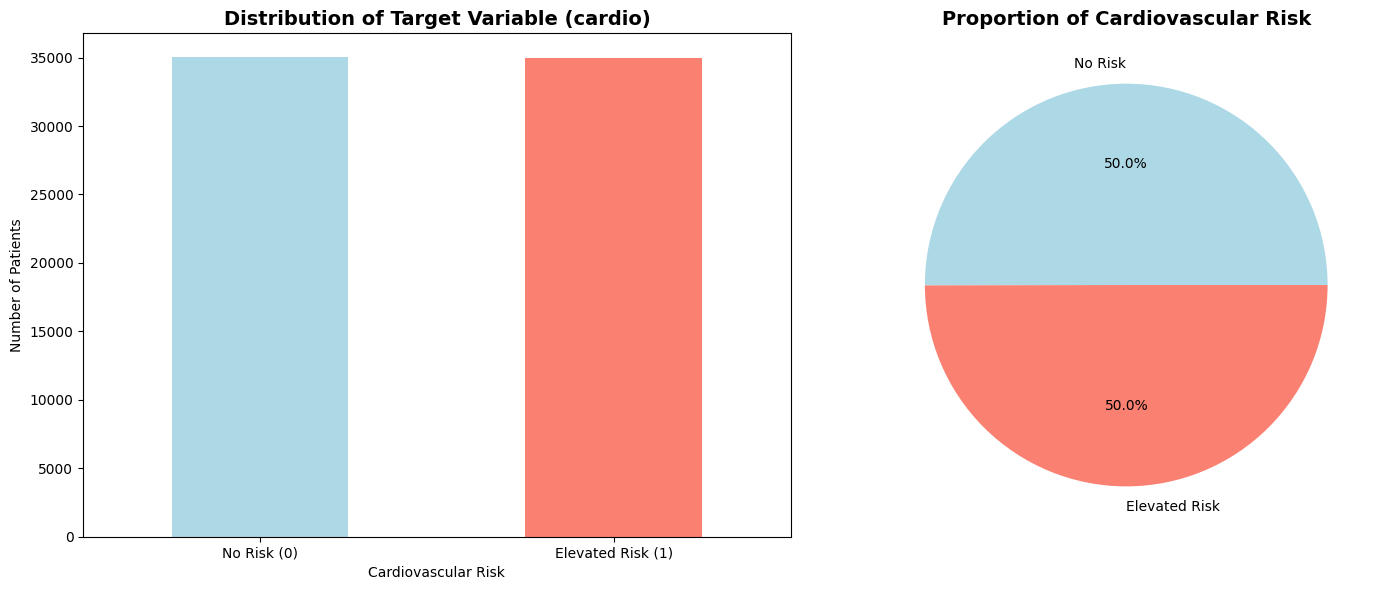


Class Balance Ratio: 0.999
Well-balanced classes


In [ ]:
# =============================================================================
# 5. TARGET VARIABLE ANALYSIS
# =============================================================================

print("TARGET VARIABLE ANALYSIS (cardio):")
print("="*40)

# Distribution of target variable
target_counts = df['cardio'].value_counts()
target_props = df['cardio'].value_counts(normalize=True)

print("Absolute frequencies:")
for val, count in target_counts.items():
    # Ensure correct indexing by converting val to the same type as target_props' index
    print(f"  cardio = {val}: {count:,} ({target_props.loc[val]*100:.1f}%)")

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar chart
target_counts.plot(kind='bar', ax=ax1, color=['lightblue', 'salmon'])
ax1.set_title('Distribution of Target Variable (cardio)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Cardiovascular Risk')
ax1.set_ylabel('Number of Patients')
ax1.set_xticklabels(['No Risk (0)', 'Elevated Risk (1)'], rotation=0)

# Pie chart
ax2.pie(target_counts.values, labels=['No Risk', 'Elevated Risk'], 
        autopct='%1.1f%%', colors=['lightblue', 'salmon'])
ax2.set_title('Proportion of Cardiovascular Risk', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Class imbalance check
imbalance_ratio = target_counts.min() / target_counts.max()
print(f"\nClass Balance Ratio: {imbalance_ratio:.3f}")
if imbalance_ratio < 0.8:
    print("Slight class imbalance - should be considered during modeling")
else:
    print("Well-balanced classes")

## Descriptive Statistics

In [18]:
# =============================================================================
# 6. DESCRIPTIVE STATISTICS
# =============================================================================

print("DESCRIPTIVE STATISTICS:")
print("="*50)

# Numeric variables
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'id' in numeric_cols:
    numeric_cols.remove('id')  # ID is not relevant for statistics

print("Numeric variables:")
display(df[numeric_cols].describe().round(2))

DESCRIPTIVE STATISTICS:
Numeric variables:


,age,height,weight,ap_hi,ap_lo
count,70000.00,70000.00,70000.00,70000.00,70000.00
mean,19468.87,164.36,74.21,128.82,96.63
std,2467.25,8.21,14.40,154.01,188.47
min,10798.00,55.00,10.00,-150.00,-70.00
25%,17664.00,159.00,65.00,120.00,80.00
50%,19703.00,165.00,72.00,120.00,80.00
75%,21327.00,170.00,82.00,140.00,90.00
max,23713.00,250.00,200.00,16020.00,11000.00


In [19]:
# Categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols += [col for col in df.columns if df[col].nunique() <= 10 and col not in categorical_cols]

if categorical_cols:
    print("\nCATEGORICAL VARIABLES:")
    for col in categorical_cols:
        if col != 'cardio':  # Target variable already analyzed
            print(f"\n{col.upper()}:")
            value_counts = df[col].value_counts()
            for val, count in value_counts.head(10).items():  # Top 10
                print(f"  {val}: {count:,} ({count/len(df)*100:.1f}%)")


CATEGORICAL VARIABLES:

GENDER:
  1: 45,530 (65.0%)
  2: 24,470 (35.0%)

CHOLESTEROL:
  1: 52,385 (74.8%)
  2: 9,549 (13.6%)
  3: 8,066 (11.5%)

GLUC:
  1: 59,479 (85.0%)
  3: 5,331 (7.6%)
  2: 5,190 (7.4%)

SMOKE:
  0: 63,831 (91.2%)
  1: 6,169 (8.8%)

ALCO:
  0: 66,236 (94.6%)
  1: 3,764 (5.4%)

ACTIVE:
  1: 56,261 (80.4%)
  0: 13,739 (19.6%)


## Age Analysis

AGE ANALYSIS:
Age range: 30 - 65 years
Mean age: 53.3 years
Median: 54 years


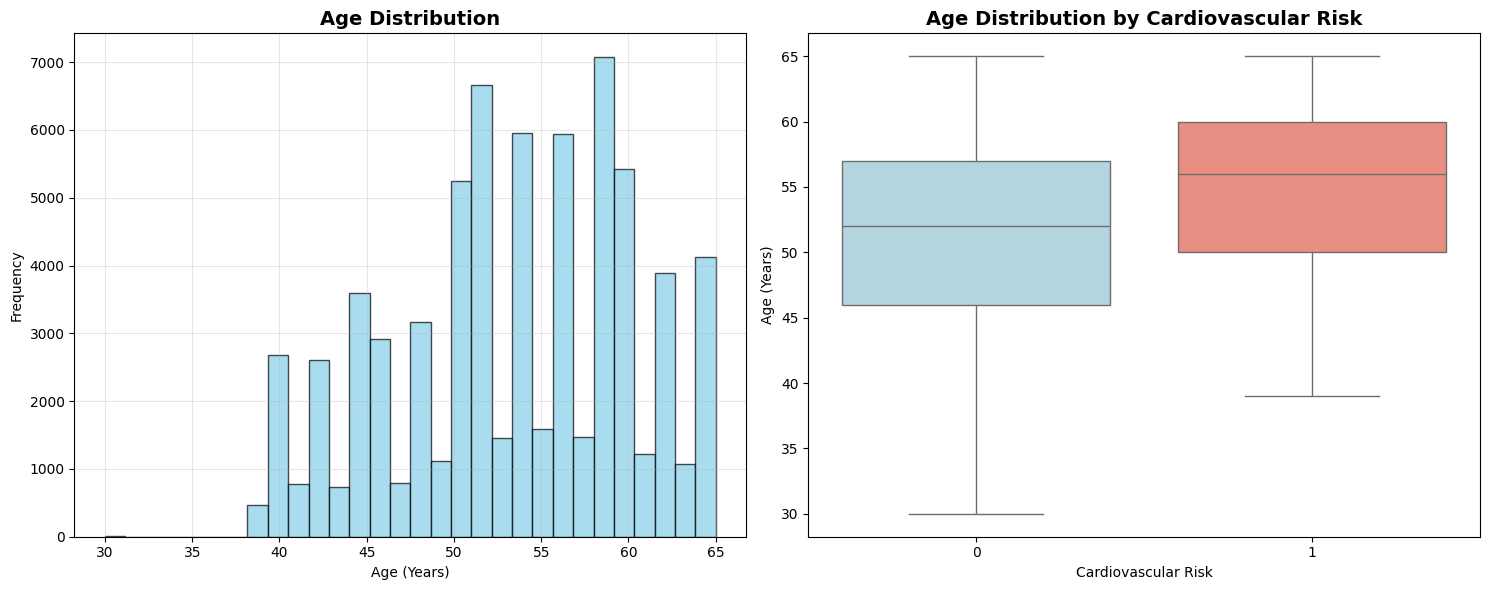

In [20]:
# =============================================================================
# 7. AGE ANALYSIS (SPECIAL: DAYS → YEARS)
# =============================================================================

print("AGE ANALYSIS:")
print("="*30)

# Convert age from days to years (if 'age' is in days)
if 'age' in df.columns:
    df['age_years'] = (df['age'] / 365.25).round(0).astype(int)
    
    print(f"Age range: {df['age_years'].min()} - {df['age_years'].max()} years")
    print(f"Mean age: {df['age_years'].mean():.1f} years")
    print(f"Median: {df['age_years'].median():.0f} years")
    
    # Visualize age distribution
    plt.figure(figsize=(15, 6))
    
    # Subplot 1: Histogram
    plt.subplot(1, 2, 1)
    plt.hist(df['age_years'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title('Age Distribution', fontsize=14, fontweight='bold')
    plt.xlabel('Age (Years)')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)
    
    # Subplot 2: Boxplot by target variable
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, x='cardio', y='age_years', palette=['lightblue', 'salmon'])
    plt.title('Age Distribution by Cardiovascular Risk', fontsize=14, fontweight='bold')
    plt.xlabel('Cardiovascular Risk')
    plt.ylabel('Age (Years)')
    
    plt.tight_layout()
    plt.show()

## Correlation Analysis

CORRELATION ANALYSIS:


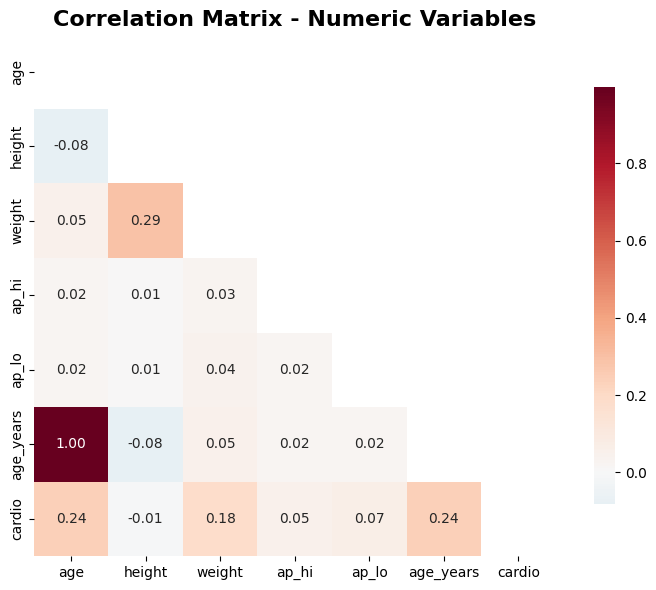


Strongest correlations with target variable:
  age            : 0.238
  age_years      : 0.238
  weight         : 0.182
  ap_lo          : 0.066
  ap_hi          : 0.054
  height         : 0.011


In [21]:
# =============================================================================
# 8. CORRELATION ANALYSIS
# =============================================================================

print("CORRELATION ANALYSIS:")
print("="*40)

# Correlation matrix for numeric variables
numeric_for_corr = [col for col in numeric_cols if col in df.columns]
if 'age_years' in df.columns:
    numeric_for_corr.append('age_years')

# Convert categorical target to numeric for correlation
df_corr = df[numeric_for_corr].copy()
if 'cardio' in df.columns:
    df_corr['cardio'] = df['cardio'].astype(int)

corr_matrix = df_corr.corr()

# Heatmap
plt.figure(figsize=(8, 6))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Hide upper triangle
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
            square=True, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Correlation Matrix - Numeric Variables', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Strongest correlations with target variable
if 'cardio' in corr_matrix.columns:
    target_corr = corr_matrix['cardio'].abs().sort_values(ascending=False)
    print("\nStrongest correlations with target variable:")
    for var, corr in target_corr.items():
        if var != 'cardio':
            print(f"  {var:15}: {corr:.3f}")

## Distribution Analysis by Target Variable

DISTRIBUTION ANALYSIS BY TARGET VARIABLE:


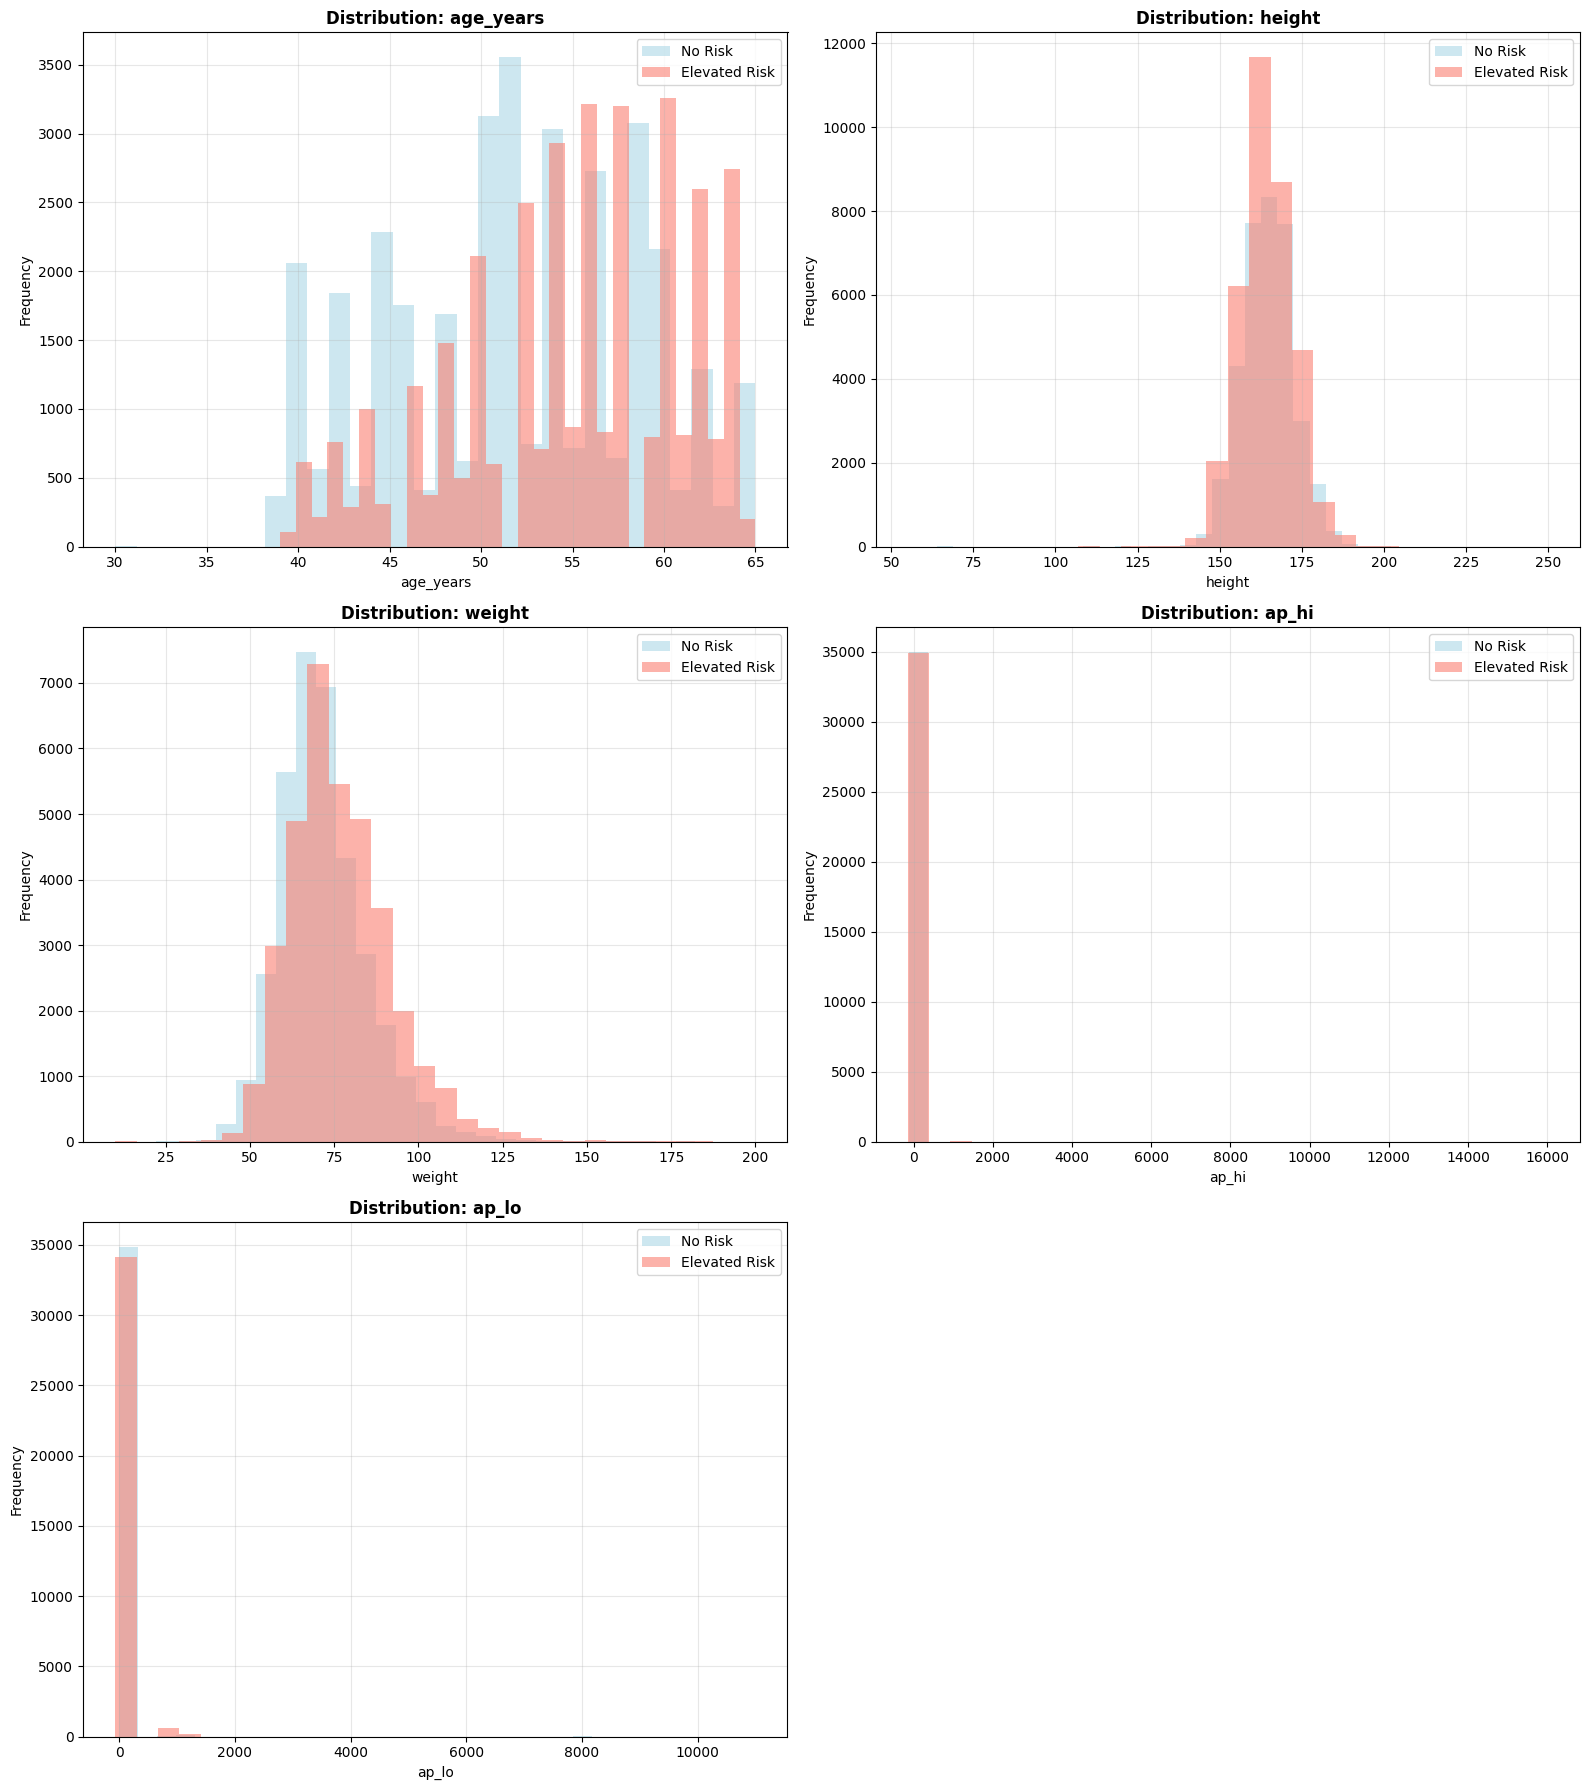

In [22]:
# =============================================================================
# 9. DISTRIBUTION ANALYSIS BY TARGET VARIABLE
# =============================================================================

print("DISTRIBUTION ANALYSIS BY TARGET VARIABLE:")
print("="*50)

# Plot important numeric variables
important_vars = ['age_years', 'height', 'weight', 'ap_hi', 'ap_lo'] if 'age_years' in df.columns else ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
important_vars = [var for var in important_vars if var in df.columns]

# Create 3x2 grid for 5 plots (6th subplot will be empty)
fig, axes = plt.subplots(3, 2, figsize=(16, 18))
axes = axes.ravel()

for i, var in enumerate(important_vars[:5]):
    # Histogram for both groups
    df[df['cardio'].astype(int) == 0][var].hist(alpha=0.6, bins=30, label='No Risk', 
                                    color='lightblue', ax=axes[i])
    df[df['cardio'].astype(int) == 1][var].hist(alpha=0.6, bins=30, label='Elevated Risk', 
                                    color='salmon', ax=axes[i])
    axes[i].set_title(f'Distribution: {var}', fontweight='bold')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

# Hide the 6th (empty) subplot
axes[5].set_visible(False)

plt.tight_layout()
plt.show()

## Advanced Outlier Analysis

In [23]:
# =============================================================================
# 10. ADVANCED OUTLIER ANALYSIS
# =============================================================================

print("ADVANCED OUTLIER ANALYSIS:")
print("="*60)

# Define plausibility ranges based on medical knowledge
plausibility_ranges = {
    'age_years': {
        'min': 0,
        'max': 120,
        'description': 'Biologically plausible human age range'
    },
    'height': {
        'min': 50,
        'max': 250,
        'description': 'Realistic height range in cm (children to very tall adults)'
    },
    'weight': {
        'min': 10,
        'max': 300,
        'description': 'Realistic weight range in kg'
    },
    'ap_hi': {
        'min': 50,
        'max': 370,
        'description': 'Systolic BP: 50-370 mmHg (extreme survival limit)'
    },
    'ap_lo': {
        'min': 30,
        'max': 360,
        'description': 'Diastolic BP: 30-360 mmHg (extreme survival limit)'
    }
}

# Additional medical plausibility checks
def check_blood_pressure_plausibility(row):
    """Check if blood pressure values are medically plausible"""
    issues = []
    
    # Systolic must be higher than diastolic
    if row['ap_hi'] <= row['ap_lo']:
        issues.append('systolic <= diastolic')
    
    # Pulse pressure (difference) should be reasonable (typically 30-50 mmHg)
    pulse_pressure = row['ap_hi'] - row['ap_lo']
    if pulse_pressure < 10:
        issues.append(f'pulse_pressure too low ({pulse_pressure})')
    elif pulse_pressure > 200:
        issues.append(f'pulse_pressure too high ({pulse_pressure})')
    
    # Extremely low values (shock/critical)
    if row['ap_hi'] < 70 or row['ap_lo'] < 40:
        issues.append('critically low BP (shock range)')
    
    # Extremely high values (hypertensive crisis)
    if row['ap_hi'] > 250 or row['ap_lo'] > 150:
        issues.append('extreme hypertensive crisis')
    
    return issues

ADVANCED OUTLIER ANALYSIS:


In [24]:
# =============================================================================
# METHOD 1: PLAUSIBILITY-BASED OUTLIER DETECTION
# =============================================================================

print("\nMETHOD 1: PLAUSIBILITY-BASED OUTLIER DETECTION")
print("="*60)

plausibility_outliers = {}

for var in important_vars[:5]:
    if var in plausibility_ranges:
        ranges = plausibility_ranges[var]
        outliers = df[(df[var] < ranges['min']) | (df[var] > ranges['max'])]
        plausibility_outliers[var] = outliers
        
        print(f"\n{var.upper()}:")
        print(f"  Range: {ranges['min']} - {ranges['max']} ({ranges['description']})")
        print(f"  Outliers: {len(outliers):,} ({len(outliers)/len(df)*100:.2f}%)")
        
        if len(outliers) > 0:
            print(f"  Min value: {df[var].min()}")
            print(f"  Max value: {df[var].max()}")
            print(f"  Values below {ranges['min']}: {(df[var] < ranges['min']).sum():,}")
            print(f"  Values above {ranges['max']}: {(df[var] > ranges['max']).sum():,}")

# Blood pressure specific checks
print("\n🩺 BLOOD PRESSURE PLAUSIBILITY CHECKS:")
print("="*60)

bp_issues = df.apply(check_blood_pressure_plausibility, axis=1)
bp_problematic = bp_issues[bp_issues.apply(len) > 0]

print(f"Total records with BP issues: {len(bp_problematic):,} ({len(bp_problematic)/len(df)*100:.2f}%)")

if len(bp_problematic) > 0:
    # Count issue types
    issue_types = {}
    for issues in bp_problematic:
        for issue in issues:
            issue_key = issue.split('(')[0].strip()  # Remove specific values
            issue_types[issue_key] = issue_types.get(issue_key, 0) + 1
    
    print("\nIssue breakdown:")
    for issue, count in sorted(issue_types.items(), key=lambda x: x[1], reverse=True):
        print(f"  • {issue}: {count:,} cases ({count/len(df)*100:.2f}%)")


METHOD 1: PLAUSIBILITY-BASED OUTLIER DETECTION

AGE_YEARS:
  Range: 0 - 120 (Biologically plausible human age range)
  Outliers: 0 (0.00%)

HEIGHT:
  Range: 50 - 250 (Realistic height range in cm (children to very tall adults))
  Outliers: 0 (0.00%)

WEIGHT:
  Range: 10 - 300 (Realistic weight range in kg)
  Outliers: 0 (0.00%)

AP_HI:
  Range: 50 - 370 (Systolic BP: 50-370 mmHg (extreme survival limit))
  Outliers: 227 (0.32%)
  Min value: -150
  Max value: 16020
  Values below 50: 188
  Values above 370: 39

AP_LO:
  Range: 30 - 360 (Diastolic BP: 30-360 mmHg (extreme survival limit))
  Outliers: 1,006 (1.44%)
  Min value: -70
  Max value: 11000
  Values below 30: 53
  Values above 360: 953

🩺 BLOOD PRESSURE PLAUSIBILITY CHECKS:
Total records with BP issues: 1,336 (1.91%)

Issue breakdown:
  • pulse_pressure too low: 1,240 cases (1.77%)
  • systolic <= diastolic: 1,236 cases (1.77%)
  • extreme hypertensive crisis: 1,015 cases (1.45%)
  • critically low BP: 243 cases (0.35%)
  • pul

In [25]:
# =============================================================================
# METHOD 2: IQR METHOD (STATISTICAL)
# =============================================================================

print("\n\nMETHOD 2: IQR METHOD (STATISTICAL)")
print("="*60)

iqr_outliers = {}

for var in important_vars[:5]:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)]
    iqr_outliers[var] = outliers
    
    print(f"{var:15}: {len(outliers):,} outliers ({len(outliers)/len(df)*100:.2f}%)")
    print(f"                 Range: [{lower_bound:.1f}, {upper_bound:.1f}]")



METHOD 2: IQR METHOD (STATISTICAL)
age_years      : 4 outliers (0.01%)
                 Range: [33.0, 73.0]
height         : 519 outliers (0.74%)
                 Range: [142.5, 186.5]
weight         : 1,819 outliers (2.60%)
                 Range: [39.5, 107.5]
ap_hi          : 1,435 outliers (2.05%)
                 Range: [90.0, 170.0]
ap_lo          : 4,632 outliers (6.62%)
                 Range: [65.0, 105.0]


In [26]:
# =============================================================================
# METHOD 3: Z-SCORE METHOD (> 3 standard deviations)
# =============================================================================

print("\n\nMETHOD 3: Z-SCORE METHOD (|z| > 3)")
print("="*60)

zscore_outliers = {}

for var in important_vars[:5]:
    z_scores = np.abs(stats.zscore(df[var]))
    outliers = df[z_scores > 3]
    zscore_outliers[var] = outliers
    
    print(f"{var:15}: {len(outliers):,} outliers ({len(outliers)/len(df)*100:.2f}%)")
    if len(outliers) > 0:
        print(f"                 Max z-score: {z_scores.max():.2f}")



METHOD 3: Z-SCORE METHOD (|z| > 3)
age_years      : 4 outliers (0.01%)
                 Max z-score: 3.45
height         : 293 outliers (0.42%)
                 Max z-score: 13.32
weight         : 702 outliers (1.00%)
                 Max z-score: 8.74
ap_hi          : 38 outliers (0.05%)
                 Max z-score: 103.18
ap_lo          : 951 outliers (1.36%)
                 Max z-score: 57.85


In [27]:
# =============================================================================
# METHOD 4: ISOLATION FOREST (MULTIVARIATE)
# =============================================================================

print("\n\nMETHOD 4: ISOLATION FOREST (MULTIVARIATE OUTLIER DETECTION)")
print("="*60)

from sklearn.ensemble import IsolationForest

# Prepare data for multivariate outlier detection
X = df[important_vars[:5]].copy()

# Fit Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outlier_labels = iso_forest.fit_predict(X)

# -1 indicates outliers, 1 indicates inliers
n_outliers = (outlier_labels == -1).sum()
print(f"Multivariate outliers detected: {n_outliers:,} ({n_outliers/len(df)*100:.2f}%)")

df['isolation_forest_outlier'] = outlier_labels



METHOD 4: ISOLATION FOREST (MULTIVARIATE OUTLIER DETECTION)
Multivariate outliers detected: 3,500 (5.00%)


In [28]:
# =============================================================================
# METHOD 5: RANSAC REGRESSION FOR HEIGHT-WEIGHT PLAUSIBILITY
# =============================================================================

print("\n\nMETHOD 5: RANSAC REGRESSION (HEIGHT-WEIGHT PLAUSIBILITY)")
print("="*60)

from sklearn.linear_model import RANSACRegressor

# Prepare data
X_height = df[['height']].values
y_weight = df['weight'].values

# Fit RANSAC regressor
ransac = RANSACRegressor(
    random_state=42,
    min_samples=0.5,  # Use 50% of data for initial fit
    residual_threshold=None,  # Automatically determined
    max_trials=1000
)

ransac.fit(X_height, y_weight)

# Get inliers and outliers
inlier_mask = ransac.inlier_mask_
outlier_mask = ~inlier_mask

n_outliers_ransac = outlier_mask.sum()
n_inliers_ransac = inlier_mask.sum()

print(f"RANSAC Results:")
print(f"  Inliers (plausible combinations):  {n_inliers_ransac:,} ({n_inliers_ransac/len(df)*100:.2f}%)")
print(f"  Outliers (implausible combinations): {n_outliers_ransac:,} ({n_outliers_ransac/len(df)*100:.2f}%)")

# Add to dataframe
df['height_weight_outlier'] = outlier_mask

# Calculate residuals for all points
y_pred = ransac.predict(X_height)
residuals = np.abs(y_weight - y_pred)

# Get statistics
print(f"\nResidual Statistics:")
print(f"  Mean absolute residual: {residuals.mean():.2f} kg")
print(f"  Median absolute residual: {np.median(residuals):.2f} kg")
print(f"  Max residual (outliers): {residuals[outlier_mask].max():.2f} kg")
print(f"  Max residual (inliers): {residuals[inlier_mask].max():.2f} kg")




METHOD 5: RANSAC REGRESSION (HEIGHT-WEIGHT PLAUSIBILITY)
RANSAC Results:
  Inliers (plausible combinations):  32,125 (45.89%)
  Outliers (implausible combinations): 37,875 (54.11%)

Residual Statistics:
  Mean absolute residual: 10.41 kg
  Median absolute residual: 8.29 kg
  Max residual (outliers): 147.02 kg
  Max residual (inliers): 9.29 kg
